https://gist.github.com/rahulrajpl/36a5724d0c261b915292182b1d741393
https://www.kaggle.com/rahulrajpl/diffusion-map-for-manifold-learning
https://github.com/arashbehboodi/DiffusionMap/blob/master/diffusionmapmod.py

In [248]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [249]:
def diffmap(xs, sigma, t, m):
    W = np.exp(-euclidean_distances(xs, xs) ** 2 /(2 * (sigma ** 2)))
    
    ## d is a vector containing the row sums of W
    d = W.sum(axis=0)
    D_inv = np.diag(1/d)
    D_left = np.diag(d ** (-0.5))
    D_right = np.diag(d ** 0.5)
    
    M = np.matmul(D_inv, W)
    M_s = np.matmul(np.matmul(D_right, M), D_left)
    
    ## M_s has nice real eigvecs and eigvals
    eigvals, eigvecs = eigh(M_s)
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    phiD = D_left @ eigvecs
    lambdaD = eigvals ** t
    
    diffusion_map = np.diag(lambdaD) @ phiD.T
    diffusion_map_trunc = diffusion_map[1:(m + 1),:]
     
#     diffusion_map_trunc = eigvecs[:,1:(m + 1)] @ np.diag(eigvals[1:(m + 1)]) 
    
    return diffusion_map_trunc

In [250]:
spiral = sio.loadmat("spiral.mat")["spiral"]

In [251]:
spiral.shape

(1000, 2)

In [252]:
thetas = sio.loadmat("spiral.mat")["thetas"]

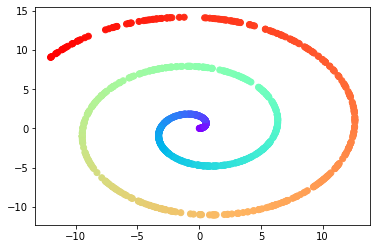

In [253]:
plt.scatter(spiral[:,0],spiral[:,1],c = thetas,cmap='rainbow')

In [262]:
diffusion_map_trunc = diffmap(spiral, 1, t = 100, m = 1)

In [263]:
diffusion_map_trunc.shape

(1, 1000)

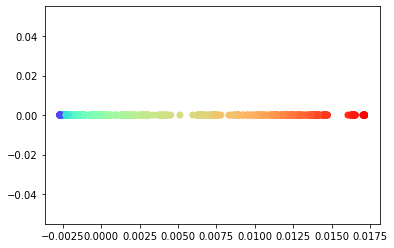

In [264]:
plt.scatter(diffusion_map_trunc[:], [0]*diffusion_map_trunc.shape[1],c=thetas,cmap ='rainbow')

In [197]:
def plot_2Dsub_figures(d_map, sigma_values, title='Diffused points'):
    subplot_titles=[f'sigma={round(sigma,4)}' for sigma in sigma_values]
    fig = make_subplots(rows=2, cols=5,subplot_titles=subplot_titles)
    for i in range(1,3):
        for j in range(1,6):
            dmap_idx = i+j-1
            fig.add_trace(
                go.Scatter(x=diffusion_map_trunc[:], y=[0]*diffusion_map_trunc.shape[1], mode='markers', marker=dict(
                size=3,c=thetas,colorscale='rainbow')),row=i, col=j)
S
    fig.update_layout(title_text=title, title_x=0.5)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    fig.update_layout(height=500, width=1000, showlegend=False)
    fig.show()

In [198]:
def apply_diffusions(sigma_start=0.1, sigma_end= 1, title='Diffused points'):
    d_maps = []
    sigma_values = np.linspace(sigma_start, sigma_end, 10)
    for sigma in sigma_values:
        d_maps.append(diffusion_map_trunc = diffmap(spiral, sigma, t = 10, m = 1))
    return d_maps, sigma_values

In [199]:
d_maps, sigma_values = apply_diffusions(0.1, 1)
plot_2Dsub_figures(d_maps,alpha_values)

TypeError: append() takes no keyword arguments